In [1]:
import networkx as nx
import pygeodesy as pg
import pandas as pd

In [2]:
# Read file
buildings = pd.read_csv("./buildings.csv")
streets = pd.read_csv("./streets.csv")
edges = pd.read_csv("./edges.csv")

In [3]:
buildings

,name,coordinate,mail_code
0,Engineering Hall,"40.1107778,-88.2291468",266
1,Materials Science and Engineering Building,"40.1108638,-88.2282995",246
2,Illini Union,"40.1093911,-88.2294342",384
3,Noyes Laboratory,"40.108482, -88.226117",712
4,Ischool,"40.107682, -88.231541",493


In [4]:
# Initialize directed graph
my_g = nx.Graph()

In [5]:
# add buildings nodes
for x in range(buildings.shape[0]):
    building = buildings.iloc[x]
    my_g.add_node(building["name"],attr_dict={"type": "building","coor":building.coordinate,"mail_code":building.mail_code})

In [6]:
# add streets nodes
for x in range(streets.shape[0]):
    street = streets.iloc[x]
    my_g.add_node(street["name"],attr_dict={"type": "street"})

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# add edge
for x in range(edges.shape[0]):
    edge = edges.iloc[x]    
    my_g.add_edge(edge.node_a,edge.node_b,{"intersect": edge.intersection})

/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserW

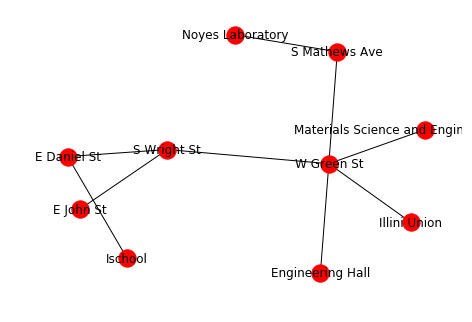

In [9]:
nx.draw(my_g,with_labels=True)

In [10]:
from pygeodesy import ellipsoidalVincenty as ev
?ev.LatLon

In [11]:
nx.all_simple_paths(my_g,"Ischool","Noyes Laboratory")

<generator object _all_simple_paths_graph at 0x11d15ff10>

In [20]:
output_paths = []
for path in nx.all_simple_paths(my_g,"Ischool","Noyes Laboratory"):
    temp_path = []
    total_path = 0
    start = None
    for node in path:
        if start == None:
            start_node = node
            start = my_g.node[node]
            if "coor" in start:
                coor = start["coor"].split(",")
                start_coor = ev.LatLon(coor[0],coor[1])
        else:
            end_node = node
            end = my_g.edge[start_node][end_node]
            if "intersect" in end:
                coor = end["intersect"].split(",")
                end_coor = ev.LatLon(coor[0],coor[1])
                dist, bearing, _  = start_coor.distanceTo3(end_coor)
                if bearing >= 45 and bearing < 135:
                    goto="East"
                elif bearing >=135 and bearing < 225:
                    goto = "South"
                elif bearing >=225 and bearing < 315:
                    goto = "West"
                else:
                    goto = "North"

                #my_g.edge[start_node][end_node]["dist"]= dist
                #my_g.edge[start_node][end_node]["bearing"]= bearing
                #my_g.edge[start_node][end_node]["goto"]= goto
                temp_path.append({'start': start_node,'end': end_node, 'dist': dist, 'bearing': bearing, 'goto': goto})
                total_path+=dist
                start_node = end_node
                start = end
                start_coor = end_coor
        # end building
    end = my_g.node[end_node]
    if "coor" in end:
        coor = end["coor"].split(",")
        end_coor = ev.LatLon(coor[0],coor[1])
        dist, bearing, _  = start_coor.distanceTo3(end_coor)
        if bearing >= 45 and bearing < 135:
            goto="East"
        elif bearing >=135 and bearing < 225:
            goto = "South"
        elif bearing >=225 and bearing < 315:
            goto = "West"
        else:
            goto = "North"
        temp_path.append({'start': start_node,'end': end_node, 'dist': dist, 'bearing': bearing, 'goto': goto})
        total_path+=dist
        #my_g.edge[start_node][end_node]["dist"]= dist
        #my_g.edge[start_node][end_node]["bearing"]= bearing
        #my_g.edge[start_node][end_node]["goto"]= goto
    output_paths.append((temp_path,total_path,len(temp_path)))

In [21]:
my_g.edge

{'E Daniel St': {'Ischool': {'intersect': '40.1079758,-88.2315345'},
  'S Wright St': {'intersect': '40.107989,-88.228856'}},
 'E John St': {'S Wright St': {'intersect': '40.1090557,-88.2289043'}},
 'Engineering Hall': {'W Green St': {'intersect': '40.1104354,-88.2269561'}},
 'Illini Union': {'W Green St': {'intersect': '40.1103287,-88.227278'}},
 'Ischool': {'E Daniel St': {'intersect': '40.1079758,-88.2315345'}},
 'Materials Science and Engineering Building': {'W Green St': {'intersect': '40.11046,-88.22613'}},
 'Noyes Laboratory': {'S Mathews Ave': {'intersect': '40.1084575,-88.225567'}},
 'S Mathews Ave': {'Noyes Laboratory': {'intersect': '40.1084575,-88.225567'},
  'W Green St': {'intersect': '40.1104712,-88.2255569'}},
 'S Wright St': {'E Daniel St': {'intersect': '40.107989,-88.228856'},
  'E John St': {'intersect': '40.1090557,-88.2289043'},
  'W Green St': {'intersect': '40.1103112,-88.2288721'}},
 'W Green St': {'Engineering Hall': {'intersect': '40.1104354,-88.2269561'},
  

In [22]:
nx.shortest_path(my_g,"Ischool","Noyes Laboratory",weight="weight")

['Ischool',
 'E Daniel St',
 'S Wright St',
 'W Green St',
 'S Mathews Ave',
 'Noyes Laboratory']

In [23]:
output_paths

[([{'bearing': 0.9732336610395282,
    'dist': 32.62729089067866,
    'end': 'E Daniel St',
    'goto': 'North',
    'start': 'Ischool'},
   {'bearing': 89.63141124181546,
    'dist': 228.37145330698132,
    'end': 'S Wright St',
    'goto': 'East',
    'start': 'E Daniel St'},
   {'bearing': 359.69499670468224,
    'dist': 257.8531500331647,
    'end': 'W Green St',
    'goto': 'North',
    'start': 'S Wright St'},
   {'bearing': 86.40224416313508,
    'dist': 283.19910944613184,
    'end': 'S Mathews Ave',
    'goto': 'East',
    'start': 'W Green St'},
   {'bearing': 180.2206574512509,
    'dist': 223.59633523311285,
    'end': 'Noyes Laboratory',
    'goto': 'South',
    'start': 'S Mathews Ave'},
   {'bearing': 273.32040591501004,
    'dist': 46.97106597657251,
    'end': 'Noyes Laboratory',
    'goto': 'West',
    'start': 'Noyes Laboratory'}],
  1072.6184048866419,
  6)]

In [24]:
# Sort output paths for the shortest path
sorted_output_paths = sorted(output_paths,key=lambda x: x[1])

# render output path
shortest = sorted_output_paths[0]
for i,path in enumerate(shortest[0]):
    if i == 0:
        print("From {} go {} to {}".format(path["start"],path["goto"],path["end"]))
    elif i == (shortest[2]-1):
        print("The destination is {} from the {}".format(path["goto"],shortest[0][i-1]["start"]))
    else:
        print("From {} go {} about {:.2f} m to {}".format(path["start"],path["goto"],path["dist"],path["end"]))        
print("Total Path: {:.2f} m".format(shortest[1]))

From Ischool go North to E Daniel St
From E Daniel St go East about 228.37 m to S Wright St
From S Wright St go North about 257.85 m to W Green St
From W Green St go East about 283.20 m to S Mathews Ave
From S Mathews Ave go South about 223.60 m to Noyes Laboratory
The destination is West from the S Mathews Ave
Total Path: 1072.62 m


/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Volumes/HD-500GB/Users/nikolausn/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserW

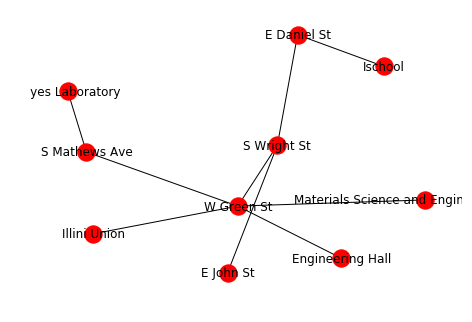

In [25]:
nx.draw(my_g,with_labels=True)